In [0]:
import pandas as pd
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
import re
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import numpy as np

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 117045 samples, validate on 39015 samples
Epoch 1/2
117045/117045 [==============================] - 250s 2ms/step - loss: 1.1256 - accuracy: 0.5570 - val_loss: 1.0116 - val_accuracy: 0.6036
Epoch 2/2
117045/117045 [==============================] - 255s 2ms/step - loss: 0.9863 - accuracy: 0.6124 - val_loss: 0.9803 - val_accuracy: 0.6146
dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


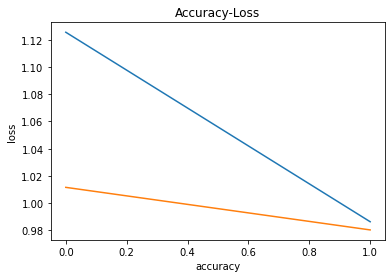

In [0]:


data = pd.read_csv('/content/drive/My Drive/dataset/sentiment-analysis-on-movie-reviews/train.tsv', sep='\t')
data1 = pd.read_csv('/content/drive/My Drive/dataset/sentiment-analysis-on-movie-reviews/test.tsv', sep='\t')
# Keeping only the neccessary columns
data = data[['Phrase','Sentiment']]
data['Phrase'] = data['Phrase'].apply(lambda x: x.lower())
data['Phrase'] = data['Phrase'].apply((lambda x: re.sub('[^a-zA-z0-9\s]', '', x)))
for idx, row in data.iterrows():
    row[0] = row[0].replace('rt', ' ')

max_fatures = 2000
tokenizer = Tokenizer(num_words=max_fatures, split=' ')
tokenizer.fit_on_texts(data['Phrase'].values)
X = tokenizer.texts_to_sequences(data['Phrase'].values)

X = pad_sequences(X)

data1 = data1[['Phrase']]
data1['Phrase'] = data1['Phrase'].apply(lambda x: x.lower())
data1['Phrase'] = data1['Phrase'].apply((lambda x: re.sub('[^a-zA-z0-9\s]', '', x)))
for idx, row in data.iterrows():
    row[0] = row[0].replace('rt', ' ')

tokenizer.fit_on_texts(data1['Phrase'].values)
Y = tokenizer.texts_to_sequences(data1['Phrase'].values)

Y = pad_sequences(Y)
Y = np.delete(Y, 0, 1)

embed_dim = 64
lstm_out = 196
def createmodel():
    model = Sequential()
    model.add(Embedding(max_fatures, embed_dim,input_length = X.shape[1]))
    model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
    model.add(Dense(5,activation='softmax'))
    model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
    return model

labelencoder = LabelEncoder()
integer_encoded = labelencoder.fit_transform(data['Sentiment'])
x = to_categorical(integer_encoded)
y = to_categorical(integer_encoded)
batch_size = 32

X_train, X_test, y_train, y_test = train_test_split(X, x, test_size=0.25, random_state=1000)
model = createmodel()

history=model.fit(X_train,y_train, epochs=2, verbose=True, validation_data=(X_test,y_test), batch_size=256)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
print(history.history.keys())
plt.title('Accuracy-Loss')
plt.xlabel('accuracy')
plt.ylabel('loss')
plt.show()


/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 109242 samples, validate on 46818 samples
Epoch 1/2
109242/109242 [==============================] - 135s 1ms/step - loss: 1.2625 - accuracy: 0.5089 - val_loss: 1.2428 - val_accuracy: 0.5111
Epoch 2/2
109242/109242 [==============================] - 130s 1ms/step - loss: 1.2373 - accuracy: 0.5123 - val_loss: 1.2377 - val_accuracy: 0.5121
dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


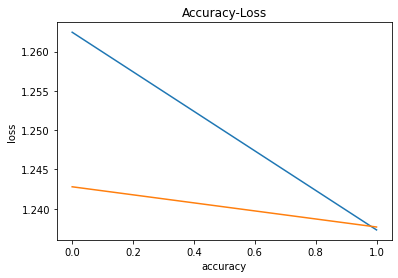

In [0]:
import pandas as pd
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.optimizers import SGD
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from keras.layers.convolutional import Conv1D, MaxPooling1D
from keras.utils.np_utils import to_categorical
import re
from sklearn.preprocessing import LabelEncoder

data = pd.read_csv('/content/drive/My Drive/dataset/sentiment-analysis-on-movie-reviews/train.tsv', sep='\t')
data1 = pd.read_csv('/content/drive/My Drive/dataset/sentiment-analysis-on-movie-reviews/test.tsv', sep='\t')
# Keeping only the neccessary columns
data = data[['Phrase','Sentiment']]
data['Phrase'] = data['Phrase'].apply(lambda x: x.lower())
data['Phrase'] = data['Phrase'].apply((lambda x: re.sub('[^a-zA-z0-9\s]', '', x)))
for idx, row in data.iterrows():
    row[0] = row[0].replace('rt', ' ')

max_fatures = 2000
tokenizer = Tokenizer(num_words=max_fatures, split=' ')
tokenizer.fit_on_texts(data['Phrase'].values)
X = tokenizer.texts_to_sequences(data['Phrase'].values)

X = pad_sequences(X)

data1 = data1[['Phrase']]
data1['Phrase'] = data1['Phrase'].apply(lambda x: x.lower())
data1['Phrase'] = data1['Phrase'].apply((lambda x: re.sub('[^a-zA-z0-9\s]', '', x)))
for idx, row in data.iterrows():
    row[0] = row[0].replace('rt', ' ')

tokenizer.fit_on_texts(data1['Phrase'].values)
Y = tokenizer.texts_to_sequences(data1['Phrase'].values)
Y = pad_sequences(Y)

embed_dim = 128
batch_size = 32

def my_model():
    model = Sequential()
    model.add(Embedding(max_fatures, embed_dim, input_length=X.shape[1]))
    model.add(
        Conv1D(128, (5), activation='relu'))
    model.add(Dropout(0.2))
    model.add(Conv1D(128, (5), activation='relu', padding='same'))
    model.add(MaxPooling1D(5))
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(5, activation='softmax'))
    return model

x = to_categorical(integer_encoded)

X_train, X_test, y_train, y_test = train_test_split(X,x, test_size=0.3, random_state=32)

epochs = 15
lrate = 0.01
decay = lrate / epochs

model = my_model()
sgd = SGD(lr=lrate, momentum=0.8, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
batch_size = 32
history=model.fit(X_train,y_train, epochs=2, verbose=True, validation_data=(X_test,y_test), batch_size=256)
Metrics, accuracy = model.evaluate(X_test, y_test, verbose=2, batch_size=batch_size)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
print(history.history.keys())
plt.title('Accuracy-Loss')
plt.xlabel('accuracy')
plt.ylabel('loss')
plt.show()

In [0]:
pip install tensorflow